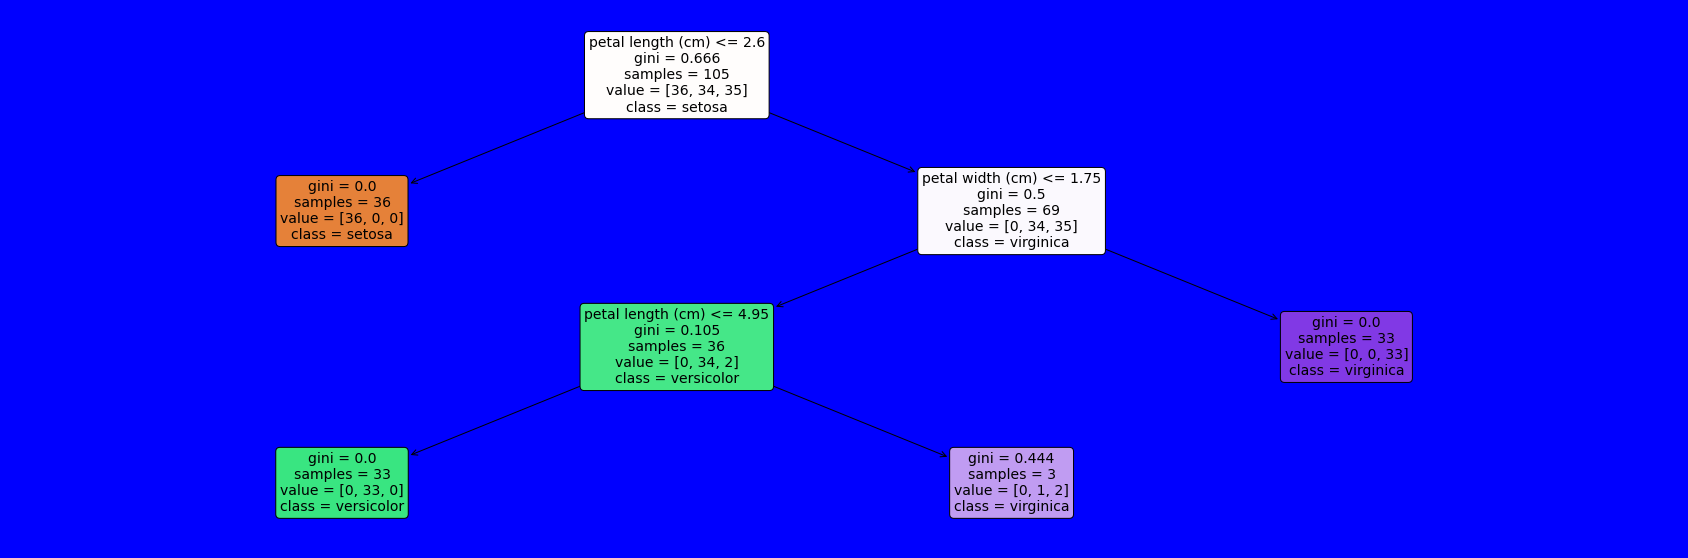

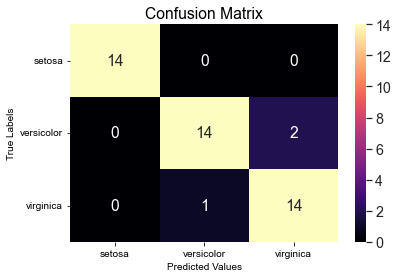

<Figure size 720x504 with 0 Axes>

Accuracy: 0.9333333333333333


In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn import metrics  
import seaborn as sns  
from sklearn.datasets import load_iris  
from sklearn.model_selection import train_test_split  
from sklearn import tree  
from sklearn.metrics import accuracy_score


iris = load_iris()  

data = pd.DataFrame(data = iris.data, columns = iris.feature_names)  
 
data['Species'] = iris.target  
  
target = np.unique(iris.target)  
target_n = np.unique(iris.target_names)  
target_dict = dict(zip(target, target_n))  
data['Species'] = data['Species'].replace(target_dict)  
 
x = data.drop(columns = "Species")  
y = data["Species"]  
names_features = x.columns  
target_labels = y.unique()  
  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 93)  
  

from sklearn.tree import DecisionTreeClassifier  
  
dtc = DecisionTreeClassifier(max_depth = 3, random_state = 93)  
  

dtc.fit(x_train, y_train)  
  

plt.figure(figsize = (30, 10), facecolor = 'b')  
Tree = tree.plot_tree(dtc, feature_names = names_features, class_names = target_labels, rounded = True, filled = True, fontsize = 14)  
plt.show()  
y_pred = dtc.predict(x_test)  
  

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)  
matrix = pd.DataFrame(confusion_matrix)  
axis = plt.axes()  
sns.set(font_scale = 1.3)  
plt.figure(figsize = (10,7))  
  

sns.heatmap(matrix, annot = True, fmt = "g", ax = axis, cmap = "magma")  
axis.set_title('Confusion Matrix')  
axis.set_xlabel("Predicted Values", fontsize = 10)  
axis.set_xticklabels([''] + target_labels)  
axis.set_ylabel( "True Labels", fontsize = 10)  
axis.set_yticklabels(list(target_labels), rotation = 0)  
plt.show()  


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
  